## About data

1. **User_ID**: A unique identifier for each customer.  
2. **Cust_name**: The name of the customer.  
3. **Product_ID**: A unique identifier for each product.  
4. **Gender**: The gender of the customer (e.g., Male, Female).  
5. **Age Group**: The age range of the customer (e.g., 18-25, 26-35).  
6. **Age**: The exact age of the customer.  
7. **Marital_Status**: The marital status of the customer (e.g., Single, Married).  
8. **State**: The state in which the customer resides.  
9. **Zone**: The geographical zone of the customer (e.g., North, South).  
10. **Occupation**: The profession or job type of the customer.  
11. **Product_Category**: The category of the purchased product (e.g., Electronics, Clothing).  
12. **Orders**: The total number of orders placed by the customer.  
13. **Amount**: The monetary value of purchases made by the customer.  


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #visualising data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Dropping null columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
# Checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Dropping null values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
#Changing data type of Amount column
df['Amount'] = df['Amount'].astype('int')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
#Describing specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

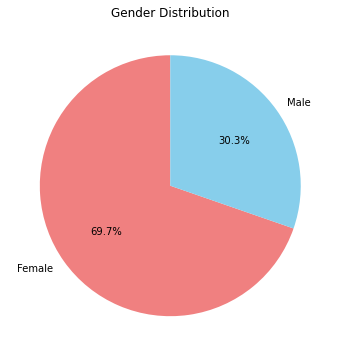

In [14]:
#Checking Gender Distribution

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index.map({'M': 'Male', 'F': 'Female'})
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Gender Distribution')
plt.show()

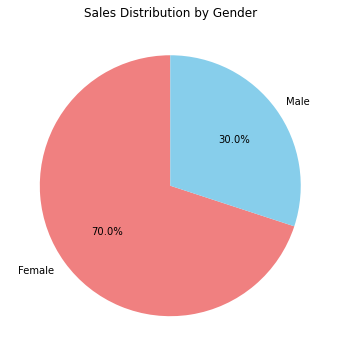

In [15]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

values = sales_gen['Amount']
labels = sales_gen['Gender'].map({'M': 'Male', 'F': 'Female'})  # Optional: Replace M/F with Male/Female

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Sales Distribution by Gender')
plt.show()

#### Insights:
- From above Graphs we can see that the Female purchasing power is more than male

### Age

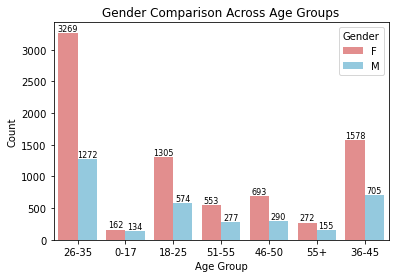

In [25]:
#Gender Comparison Across Age Groups

ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette=['lightcoral', 'skyblue'])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(format(height, '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Gender Comparison Across Age Groups')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()

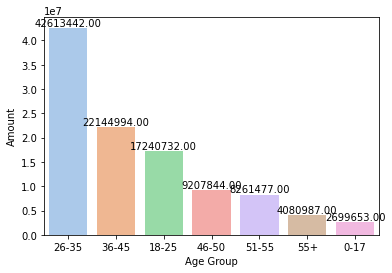

In [24]:
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age, palette= 'pastel')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')



### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

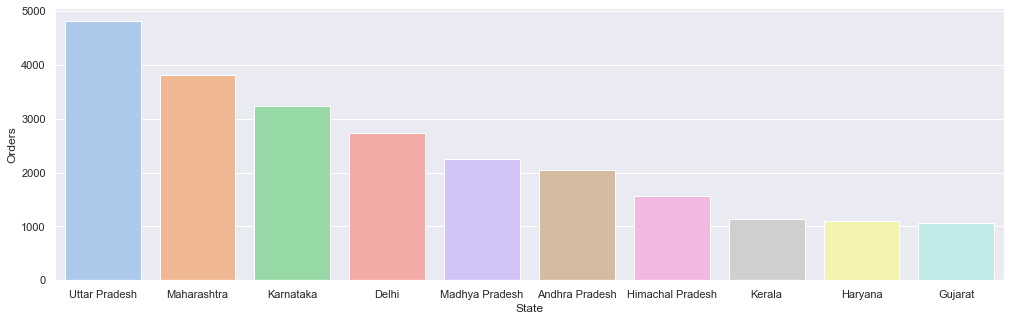

In [27]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette= 'pastel')

<AxesSubplot:xlabel='State', ylabel='Amount'>

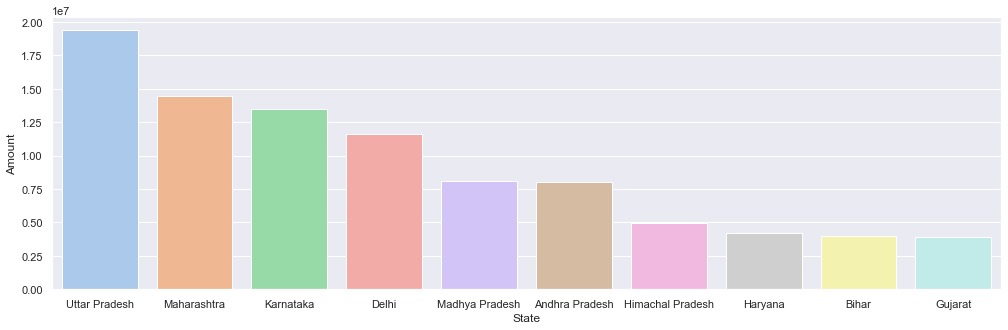

In [28]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette='pastel')

#### Insights
- From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


### Marital Status

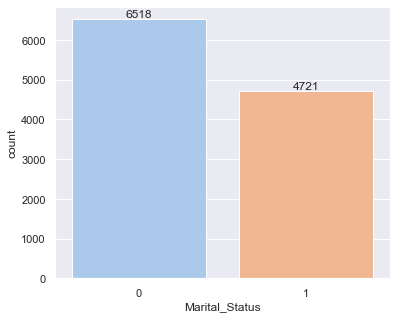

In [32]:
ax = sns.countplot(data=df, x='Marital_Status', palette='pastel')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Set the figure size
sns.set(rc={'figure.figsize': (7, 5)})

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

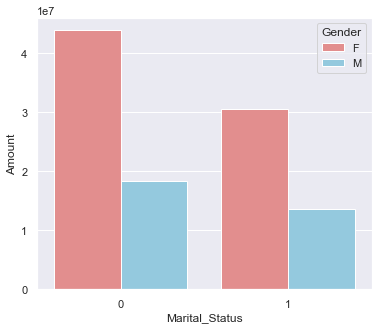

In [34]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender',palette=['lightcoral', 'skyblue'])

#### Insights
- From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

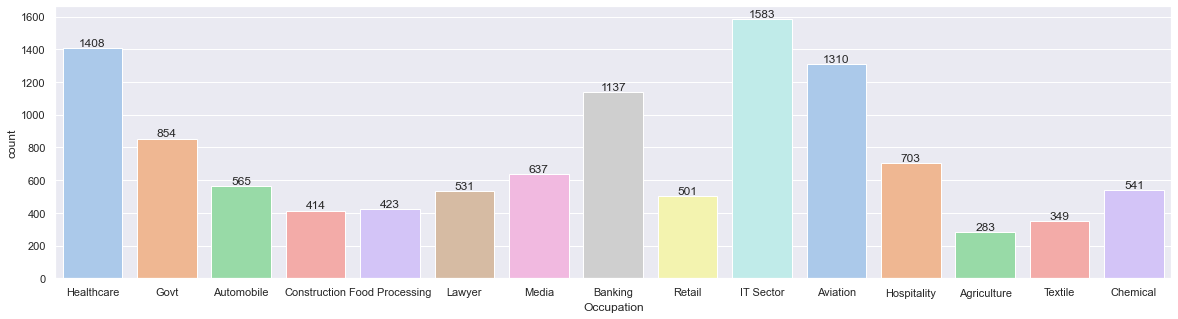

In [35]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the countplot
ax = sns.countplot(data=df, x='Occupation',palette='pastel')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

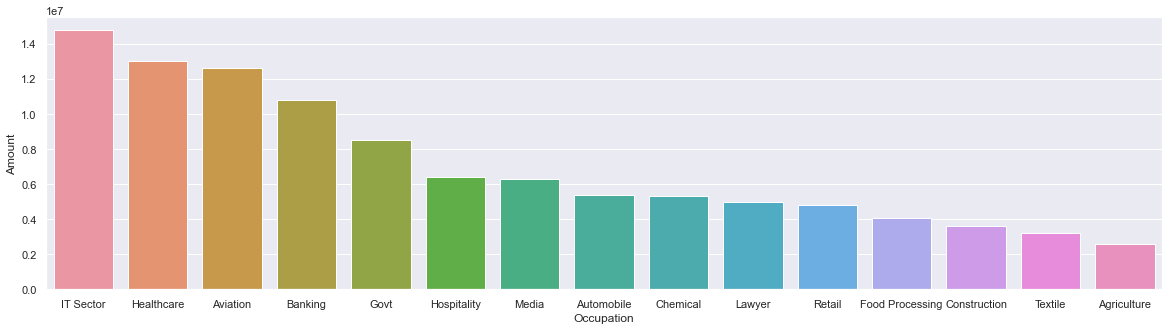

In [36]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

#### Insights
- From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

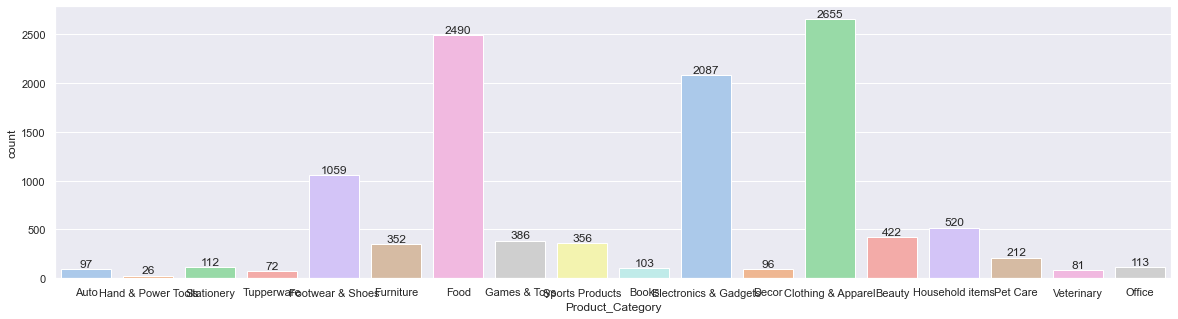

In [40]:
# Set the figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Create the countplot
ax = sns.countplot(data=df, x='Product_Category',palette='pastel')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

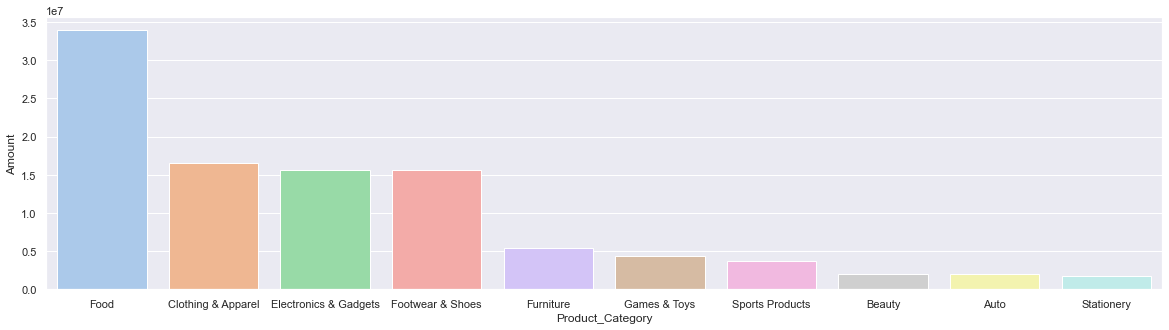

In [39]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette='pastel')

#### Insights
- From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category


<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

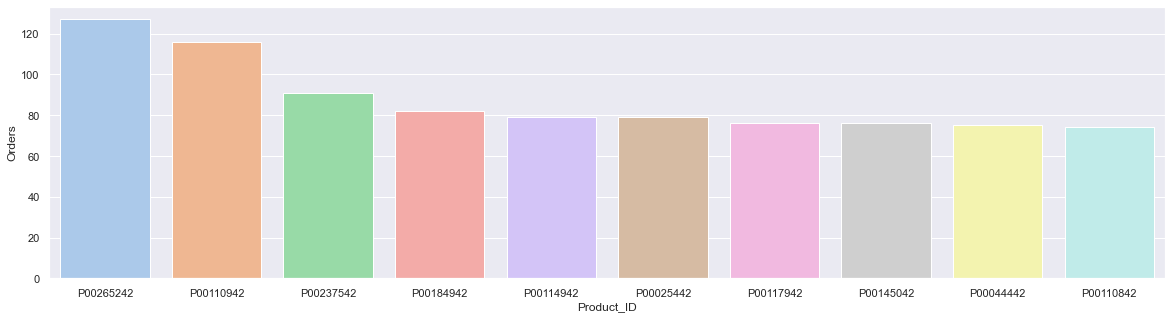

In [42]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette='pastel')

## Conclusion

1. **Demographic Characteristics**  
   - Focus is on **married women** aged **26–35 years**.  
   - Residing in the states of **Uttar Pradesh (UP), Maharashtra, and Karnataka**.

2. **Occupational Insights**  
   - These women are employed in specific sectors: **IT**, **Healthcare**, and **Aviation**.  
   - These professions may indicate higher disposable income and a tendency toward planned purchases.  

3. **Consumer Preferences**  
   - The preferred product categories are **Food**, **Clothing**, and **Electronics**.  
   - These categories suggest a mix of basic necessities, lifestyle enhancements, and aspirational products.  

4. **Geographical Influence**  
   - Uttar Pradesh, Maharashtra, and Karnataka are populous states with diverse urban-rural divides.  
   - These states have well-established markets for the targeted product categories.  

5. **Age-Specific Behavioral Trends**  
   - The **26–35 age group** represents a key consumer demographic, often characterized by family-oriented spending habits.  
   - This group may prioritize quality, brand reliability, and value-for-money products.  

6. **Marital Status Impact**  
   - Married women may have more structured purchasing patterns, influenced by household responsibilities and family needs.  
   - Their spending may also align with the preferences and demands of their families.

7. **Sectoral Preferences for Products**  
   - **IT professionals** might lean toward technology-driven and convenience-based purchases (e.g., Electronics).  
   - **Healthcare workers** may prioritize health-related and lifestyle-sustaining products (e.g., Food, comfortable Clothing).  
   - **Aviation professionals** could focus on both aspirational and functional products, given the high-mobility nature of their work.  

8. **Market Implications**  
   - Marketing strategies targeting this group should highlight affordability, quality, and utility.  
   - Digital platforms and region-specific campaigns may effectively capture this demographic’s attention.  
